<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-Katty/blob/main/Actividad_Semanal_5_Repaso_Transformaci%C3%B3n_y_reducci%C3%B3n_de_dimensiones.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nombre: Katherine Vanegas Salamanca

Matricula: A01794113

Materia: Ciencia de datos

Profesor: Maria de la Paz Rico / Roberto Guevara González 

# Bienvenido al notebook
#Repaso de Reducción de dimensiones
El objetivo es que entendamos de una manera visual, que es lo que pasa cuando nosotros seleccionamos cierto número de componentes principales o % de variabilidad  de una base de datos.

Primero entenderemos, que pasa adentro de PCA que se basa en lo siguiente a grandes razgos:

**Análisis de Componentes Principales**

El análisis de datos multivariados involucra determinar transformaciones lineales que ayuden
a entender las relaciones entre las características importantes de los datos. La idea central del Análisis de Componentes Principales (PCA) es reducir las dimensiones de un conjunto de datos que presenta variaciones correlacionadas, reteniendo una buena proporción de la variación presente en dicho conjunto. Esto se logra obteniendo la transformación a un nuevo conjunto de variables: los componentes principales (PC). Cada PC es una combinación lineal con máxima varianza en dirección ortogonal a los demás PC.


![title](https://miro.medium.com/max/720/1*XGaA7KWUlhWZLIezYEBIHA.gif)


Para entender un poco más de PCA y SVD, visita el siguiente link:
*Truco: Prueba entrar con tu cuenta del tec :)*

https://towardsdatascience.com/pca-and-svd-explained-with-numpy-5d13b0d2a4d8


Basicamente, vamos a seguir los siguientes pasos:

1. Obtener la covarianza. OJO: X tiene sus datos centrados :)

![title](https://miro.medium.com/max/194/1*92t9OuqxIG0YpJXsNNgI4A.png)

2. Los componentes principales se van a obtener de la eigen descomposicion de la matriz de covarianza.

![title](https://miro.medium.com/max/260/1*c1S0_26A8RxEQQUVyMp5Vw.png)

3. Para la reducción de dimensiones vamos a seleccionar k vectores de W y proyectaremos nuestros datos.

![title](https://miro.medium.com/max/214/1*jnj2YMpWIApnCzxRU_zjfg.png)

![title](https://miro.medium.com/max/720/1*ba0XpZtJrgh7UpzWcIgZ1Q.jpeg)






# Ejercicio 1, Descomposición y composición
***Descomposición***

Encuentra los eigenvalores y eigenvectores de las siguientes matrices

$A = \begin{pmatrix} 3,0,2 \\ 3,0,-2 \\ 0,1,1 \end{pmatrix}$
$A2 = \begin{pmatrix} 1,3,8 \\ 2,0,0 \\ 0,0,1 \end{pmatrix}$
$A3 = \begin{pmatrix} 5,4,0 \\ 1,0,1 \\ 10,7,1 \end{pmatrix}$

y reconstruye la matriz original a traves de las matrices 
$WDW^{-1}$ (OJO. Esto es lo mismo de la ecuación del paso 2 solo le cambiamos la variable a la matriz diagonal)




# Eigenvalores y eigenvectores

In [8]:
###-----------------EJEMPLO DE EIGENVALORES
import numpy as np
from numpy import array
from numpy.linalg import eig
# define la matriz
A = array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
print("-------Matriz original-------")
print(A)
print("-----------------------------")
# calcula la eigendescomposición
values, vectors = eig(A)
print(values) #D
print(vectors) #W

#Ejemplo de reconstrucción


values, vectors = np.linalg.eig(A)

W = vectors
Winv = np.linalg.inv(W)
D = np.diag(values)
#la matriz B tiene que dar igual a A
#reconstruye la matriz 
print("-------Matriz reconstruida-------")
# Realiza la reconstruccion de B=W*D*Winv, te da lo mismo de A?
#ojo, estas multiplicando matrices, no escalares ;)
#TU CODIGO AQUI-------------------------------------
B= np.dot(np.dot(W,D), Winv)
print(B)
print("-----------------------------")

-------Matriz original-------
[[1 2 3]
 [4 5 6]
 [7 8 9]]
-----------------------------
[ 1.61168440e+01 -1.11684397e+00 -1.30367773e-15]
[[-0.23197069 -0.78583024  0.40824829]
 [-0.52532209 -0.08675134 -0.81649658]
 [-0.8186735   0.61232756  0.40824829]]
-------Matriz reconstruida-------
[[1. 2. 3.]
 [4. 5. 6.]
 [7. 8. 9.]]
-----------------------------


In [40]:
matrizA = array([[3, 0, 2], [3, 0, -2], [0, 1, 1]])
print("-------Matriz original-------")
print(matrizA)
print("-----------------------------")

values1, vectors1 = eig(matrizA)
print(values1) #D
print(vectors1) #W

#reconstrucción
values1, vectors1 = np.linalg.eig(matrizA)

W1 = vectors1
Winv1 = np.linalg.inv(W1)
D1 = np.diag(values1)
print("-------Matriz reconstruida-------")
B1= np.dot(np.dot(W1,D1), Winv1).round()
print(B1.real)
print("-----------------------------")

-------Matriz original-------
[[ 3  0  2]
 [ 3  0 -2]
 [ 0  1  1]]
-----------------------------
[3.54451153+0.j         0.22774424+1.82582815j 0.22774424-1.82582815j]
[[-0.80217543+0.j         -0.04746658+0.2575443j  -0.04746658-0.2575443j ]
 [-0.55571339+0.j          0.86167879+0.j          0.86167879-0.j        ]
 [-0.21839689+0.j         -0.16932106-0.40032224j -0.16932106+0.40032224j]]
-------Matriz reconstruida-------
[[ 3.  0.  2.]
 [ 3.  0. -2.]
 [ 0.  1.  1.]]
-----------------------------


In [41]:
matrizA2 = array([[1, 3, 8], [2, 0, 0], [0, 0, 1]])
print("-------Matriz original-------")
print(matrizA2)
print("-----------------------------")

values2, vectors2 = eig(matrizA2)
print(values2) #D
print(vectors2) #W

#reconstrucción
values2, vectors2 = np.linalg.eig(matrizA2)

W2 = vectors2
Winv2 = np.linalg.inv(W2)
D2 = np.diag(values2)
print("-------Matriz reconstruida-------")
B2= np.dot(np.dot(W2,D2), Winv2).round(0)
print(B2.real)
print("-----------------------------")

-------Matriz original-------
[[1 3 8]
 [2 0 0]
 [0 0 1]]
-----------------------------
[ 3. -2.  1.]
[[ 0.83205029 -0.70710678 -0.42399915]
 [ 0.5547002   0.70710678 -0.8479983 ]
 [ 0.          0.          0.31799936]]
-------Matriz reconstruida-------
[[1. 3. 8.]
 [2. 0. 0.]
 [0. 0. 1.]]
-----------------------------


In [42]:
matrizA3 = array([[5, 4, 0], [1, 0, 1], [10, 7, 1]])
print("-------Matriz original-------")
print(matrizA3)
print("-----------------------------")

values3, vectors3 = eig(matrizA3)
print(values3) #D
print(vectors3) #W

#reconstrucción
values3, vectors3 = np.linalg.eig(matrizA3)

W3 = vectors3
Winv3 = np.linalg.inv(W3)
D3 = np.diag(values3)
print("-------Matriz reconstruida-------")
B3= np.dot(np.dot(W3,D3), Winv3).round(0)
print(B3.real)
print("-----------------------------")

-------Matriz original-------
[[ 5  4  0]
 [ 1  0  1]
 [10  7  1]]
-----------------------------
[ 6.89167094 -0.214175   -0.67749594]
[[ 0.3975395   0.55738222  0.57580768]
 [ 0.18800348 -0.72657211 -0.81728644]
 [ 0.89811861 -0.40176864 -0.02209943]]
-------Matriz reconstruida-------
[[ 5.  4. -0.]
 [ 1. -0.  1.]
 [10.  7.  1.]]
-----------------------------


Conclusiones:

Luego de hallar los valores y vectores propios se realiza la validación mediante la reconstrucción de la matriz original multiplicando la matriz de vectores propios * la diagonal de los valores propios * la matriz inversa de los vectores propios, con lo cual se llega a la matriz original

**¿Qué significa  reducir dimensiones?**

Esto será cuando proyectemos a ese espacio de los componentes principales pero no los seleccionemos todos, solo los más importantes y viajemos de regreso a nuestras unidades a través de una proyección.

Es decir:
Unidades-PC
PC-Unidades

Veamoslo gráficamente, ¿qué pasa con esa selección de los PCs y su efecto?.


Para ello usaremos Singular Value Descomposition (SVD).



# Singular Value Descomposition(SVD)

Es otra descomposición que tambien nos ayudara a reducir dimensiones.

<img src="https://miro.medium.com/max/720/1*6wkgGgBy2NLVmRVOw8K86w.png" width="300">



#Ejercicio 2
Juega con Lucy, una cisne, ayudala a encontrar cuantos valores singulares necesita para no perder calidad a través de SVD. Posteriormente usa 3 imágenes de tu preferencia y realiza la misma acción :D

A esto se le llama **compresión de imagenes** :o

[72. 73. 74. ... 48. 47. 47.]


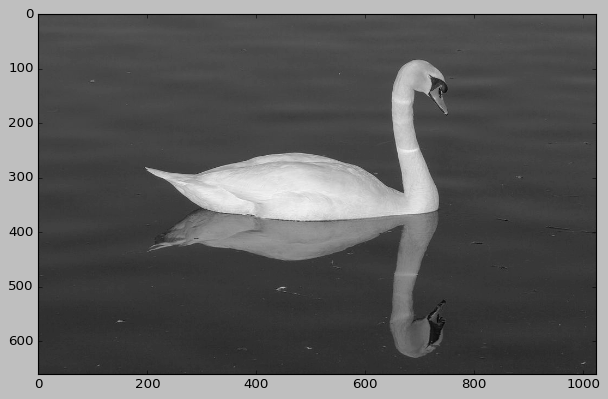

<PIL.Image.Image image mode=LA size=1024x660 at 0x7FB9F1AF5950>


In [18]:
from six.moves import urllib
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

plt.style.use('classic')
img = Image.open(urllib.request.urlopen('https://biblioteca.acropolis.org/wp-content/uploads/2015/03/Cisne.jpg')).convert('LA')
#img = Image.open('lucy.jpg')
imggray = img.convert('LA')
imgmat = np.array(list(imggray.getdata(band=0)),float)

print(imgmat)

imgmat.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat,cmap='gray')
plt.show()
print(img)

In [19]:
U,D,V = np.linalg.svd(imgmat)
imgmat.shape


(660, 1024)

In [20]:
U.shape

(660, 660)

In [21]:
V.shape

(1024, 1024)

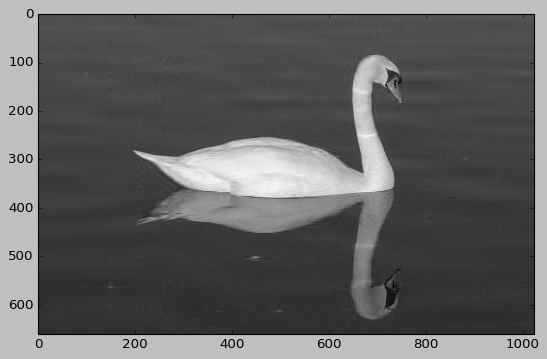

Felicidades la imagen está comprimida


In [22]:
#Cuantos valores crees que son necesarios?
#A=U*D*V
#aqui los elegiremos---------------------------
# por las dimensiones de este caso en particular 
#iremos de 0-660, siendo 660 como normalmente están los datos
#con 50 podemos observar que Lucy se ve casi igual, es decir conservamos aquello que en 
# realidad estaba aportando a la imagen en este caso :D por medio de la variabilidad 
#juega con el valor nvalue y ve que pasa con otros valores
nvalue = 50
#------------------------------
reconstimg = np.matrix(U[:,:nvalue])*np.diag(D[:nvalue])*np.matrix(V[:nvalue,:])
#ve las dimensiones de la imagen y su descomposicion
#660x1024= U(660X660)D(660X1024)V(1024x1024)
        #=U(660Xnvalues)D(nvaluesXnvalue)V(nvaluesx1024)

        #=U(660X50)(50X50)(50X1024)
plt.imshow(reconstimg,cmap='gray')
plt.show()
print("Felicidades la imagen está comprimida")

¡Ahora es tu turno!, comprime 3 imagenes

In [50]:
from google.colab import drive

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


[69. 72. 77. ... 29. 28. 27.]


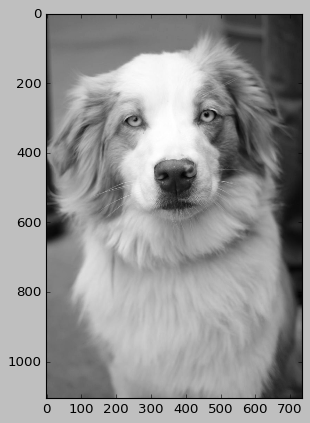

<PIL.Image.Image image mode=LA size=1024x660 at 0x7FB9F1AF5950>


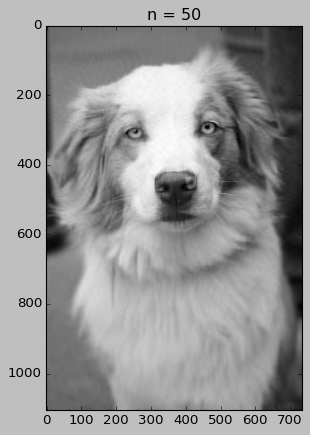

Felicidades la imagen está comprimida


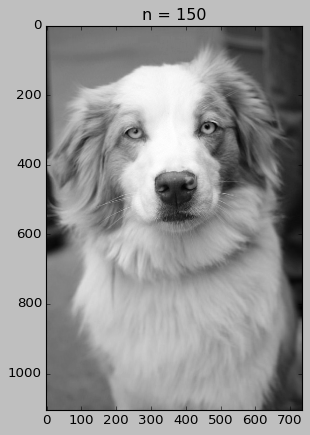

Felicidades la imagen está comprimida


In [72]:
plt.style.use('classic')
imagen1 = Image.open(urllib.request.urlopen('https://i.pinimg.com/736x/8d/1d/14/8d1d14a69dd30af4a4ca2a51376d900e--red-merle-australian-shepherd-aussie-shepherd.jpg')).convert('LA')
imggray = imagen1.convert('LA')
imgmat1 = np.array(list(imggray.getdata(band=0)),float)

print(imgmat1)

imgmat1.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat1,cmap='gray')
plt.show()
print(img)

U1,D1,V1 = np.linalg.svd(imgmat1)
imgmat1.shape

for i in range (50, 250, 100):
    reconstimg1 = np.matrix(U1[:,:i])*np.diag(D1[:i])*np.matrix(V1[:i,:])
    plt.imshow(reconstimg1,cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()
    print("Felicidades la imagen está comprimida")



[ 45.  42. 194. ...  35.  40.  58.]


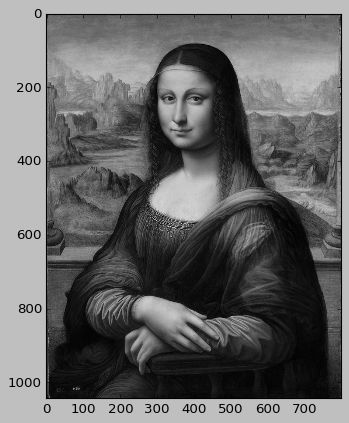

<PIL.Image.Image image mode=LA size=1024x660 at 0x7FB9F1AF5950>


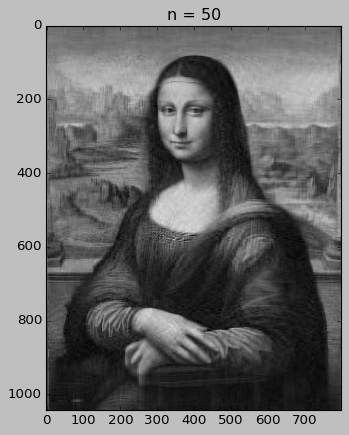

Felicidades la imagen está comprimida


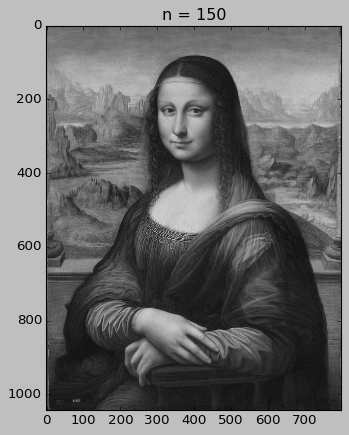

Felicidades la imagen está comprimida


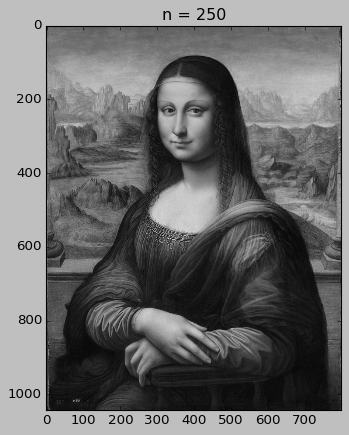

Felicidades la imagen está comprimida


In [74]:
plt.style.use('classic')
imagen2 = Image.open(urllib.request.urlopen('https://upload.wikimedia.org/wikipedia/commons/thumb/9/99/Gioconda_%28copia_del_Museo_del_Prado_restaurada%29.jpg/800px-Gioconda_%28copia_del_Museo_del_Prado_restaurada%29.jpg')).convert('LA')
imggray = imagen2.convert('LA')
imgmat2 = np.array(list(imggray.getdata(band=0)),float)

print(imgmat2)

imgmat2.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat2,cmap='gray')
plt.show()
print(img)

U2,D2,V2 = np.linalg.svd(imgmat2)
imgmat2.shape

for i in range (50, 350, 100):
    reconstimg2 = np.matrix(U2[:,:i])*np.diag(D2[:i])*np.matrix(V2[:i,:])
    plt.imshow(reconstimg2,cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()
    print("Felicidades la imagen está comprimida")




[92. 68. 98. ... 80. 85. 86.]


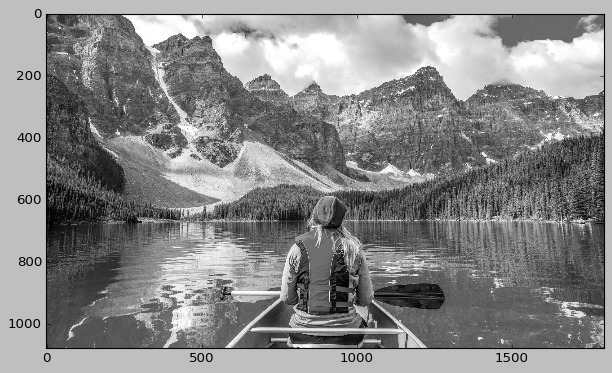

<PIL.Image.Image image mode=LA size=1024x660 at 0x7FB9F1AF5950>


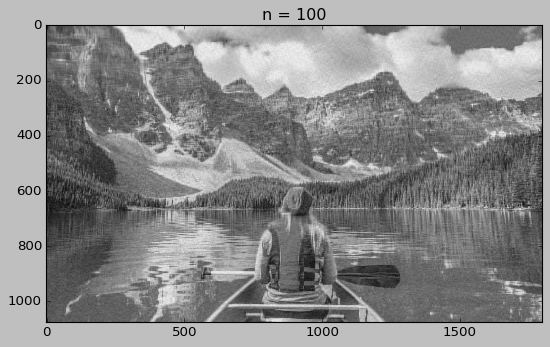

Felicidades la imagen está comprimida


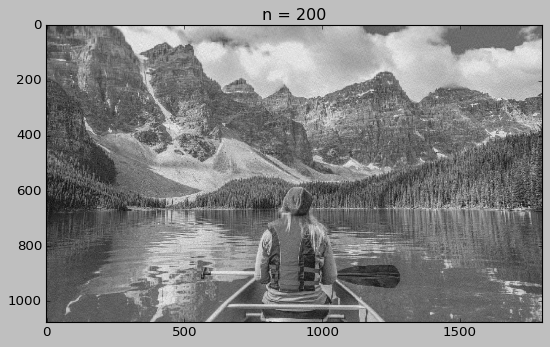

Felicidades la imagen está comprimida


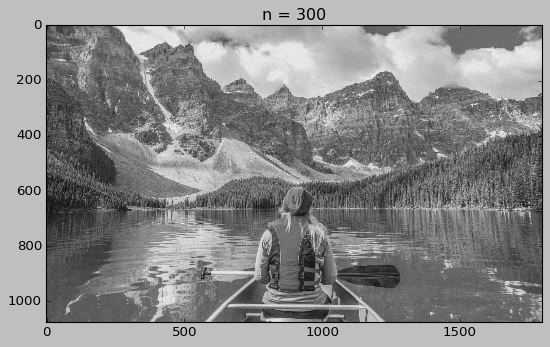

Felicidades la imagen está comprimida


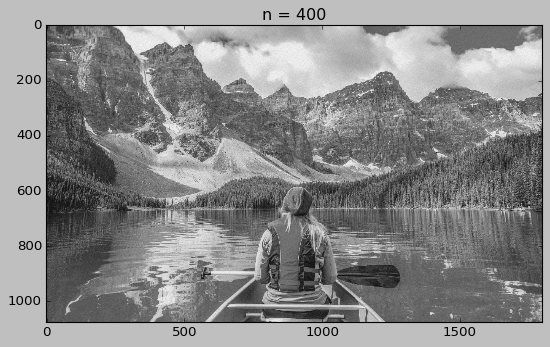

Felicidades la imagen está comprimida


In [76]:
plt.style.use('classic')
imagen3 = Image.open(urllib.request.urlopen('https://elviajerofeliz.com/wp-content/uploads/2015/09/paisajes-de-Canada.jpg')).convert('LA')
imggray = imagen3.convert('LA')
imgmat3 = np.array(list(imggray.getdata(band=0)),float)

print(imgmat3)

imgmat3.shape = (imggray.size[1],imggray.size[0])

plt.figure(figsize=(9,6))
plt.imshow(imgmat3,cmap='gray')
plt.show()
print(img)

U3,D3,V3 = np.linalg.svd(imgmat3)
imgmat3.shape

for i in range (100, 500, 100):
    reconstimg3 = np.matrix(U3[:,:i])*np.diag(D3[:i])*np.matrix(V3[:i,:])
    plt.imshow(reconstimg3,cmap='gray')
    title = "n = %s" % i
    plt.title(title)
    plt.show()
    print("Felicidades la imagen está comprimida")

La descomposición de imagenes por el metodo SVD:

se toman principalmente los pixeles de la imagen como matrices, las cuales realiza una reduccion de dimensiones efectiva sin sacrificar la calidad de la imagen. Durante el proceso, se extra la informacion de la data y se convierte en un arreglo, para posteriormente hallar las dimensiones, en este último caso 660x1024. Luego de aplica el metodo SVD sobre la matriz original, la cual es descompuesta en 2 matrices unitarias y una diagonal

En este caso se prueba con diferentes valores en las columnas y filas de las matrices buscando que sean menores a los reales, las cuales al ser multiplicadas la calidad de la imagen no se vea tan afectada.




# Ejercicio 3

**Feature importances**

Para este ejercicio, te pediremos que sigas el tutorial de la siguiente pagina:

https://towardsdatascience.com/pca-clearly-explained-how-when-why-to-use-it-and-feature-importance-a-guide-in-python-7c274582c37e




In [97]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
plt.style.use('ggplot')

iris = datasets.load_iris() # se carga la base de datos de iris la cual se compone de 50 filas x 4 columnas
X = iris.data
y = iris.target


# Z-score the features
scaler = StandardScaler() # se utiliza StandarScaler para estandarizar los datos buscando que la desviación estandar sea 1 y la media 0
scaler.fit(X)
X = scaler.transform(X)


# Una vez estandarizados los datos se aplica el modelo PCA con un numero de componentes = 2
pca = PCA(n_components=2) # 2 componentes
X_new = pca.fit_transform(X) 

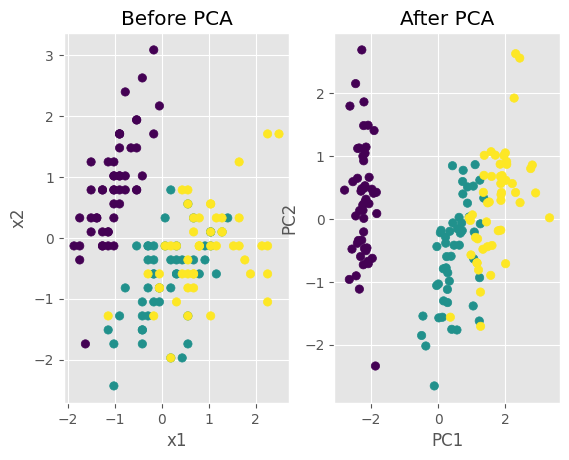

In [93]:
fig, axes = plt.subplots(1,2)
axes[0].scatter(X[:,0], X[:,1], c=y)
axes[0].set_xlabel('x1')
axes[0].set_ylabel('x2')
axes[0].set_title('Before PCA')
axes[1].scatter(X_new[:,0], X_new[:,1], c=y)
axes[1].set_xlabel('PC1')
axes[1].set_ylabel('PC2')
axes[1].set_title('After PCA')
plt.show()

In [79]:
print(pca.explained_variance_ratio_) # se explica la varianza de cada uno de los componentes, 
#se busca que el menor número de componentes expliquen la mayor varianza


[0.72962445 0.22850762]


In [80]:
np.cov(X_new.T) #matriz de covarianza

array([[2.93808505e+00, 5.33928780e-16],
       [5.33928780e-16, 9.20164904e-01]])

In [82]:
pca.explained_variance_ # se evidencia que la diagonal de la matriz de covarianza es igual varianza explicada del modelo PCA

array([2.93808505, 0.9201649 ])

In [83]:
print(abs( pca.components_ )) # se identifica que variables explican mejor cada componente
#en PC1 es el 1,3 y 4 variable
#en PC2 es 1 y 2 principalmente

[[0.52106591 0.26934744 0.5804131  0.56485654]
 [0.37741762 0.92329566 0.02449161 0.06694199]]


In [84]:
def biplot(score, coeff , y):
    '''
    Author: Serafeim Loukas, serafeim.loukas@epfl.ch
    Inputs:
       score: the projected data
       coeff: the eigenvectors (PCs)
       y: the class labels
   '''
    xs = score[:,0] # projection on PC1
    ys = score[:,1] # projection on PC2
    n = coeff.shape[0] # number of variables
    plt.figure(figsize=(10,8), dpi=100)
    classes = np.unique(y)
    colors = ['g','r','y']
    markers=['o','^','x']
    for s,l in enumerate(classes):
        plt.scatter(xs[y==l],ys[y==l], c = colors[s], marker=markers[s]) # color based on group
    for i in range(n):
        #plot as arrows the variable scores (each variable has a score for PC1 and one for PC2)
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], color = 'k', alpha = 0.9,linestyle = '-',linewidth = 1.5, overhang=0.2)
        plt.text(coeff[i,0]* 1.15, coeff[i,1] * 1.15, "Var"+str(i+1), color = 'k', ha = 'center', va = 'center',fontsize=10)

    plt.xlabel("PC{}".format(1), size=14)
    plt.ylabel("PC{}".format(2), size=14)
    limx= int(xs.max()) + 1
    limy= int(ys.max()) + 1
    plt.xlim([-limx,limx])
    plt.ylim([-limy,limy])
    plt.grid()
    plt.tick_params(axis='both', which='both', labelsize=14)

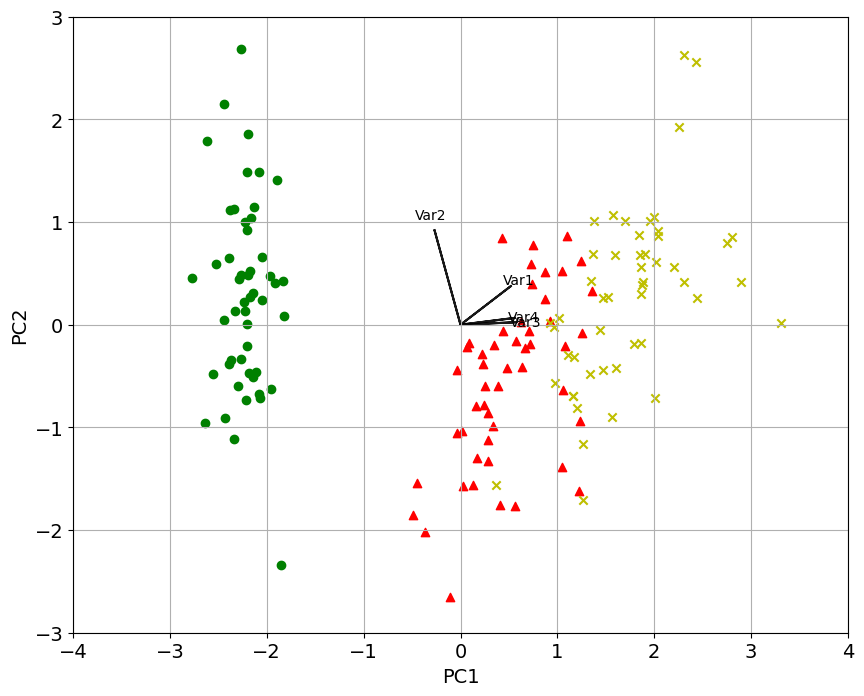

In [85]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault) 

biplot(X_new[:,0:2], np.transpose(pca.components_[0:2, :]), y)
plt.show()

Describe lo relevante del ejercicio y que descubriste de las variables análizadas. 

Contesta las siguientes preguntas en una o varias celdas de texto en tu notebook:

 

Realiza un comentario relacionado a los pasos que se llevaron a cabo en este proceso de features importances.

Luego de hallar los componentes principales, se identifica la importancia de cada PC el cual esta explicado por la magnitud de los correspondientes valores propios 

¿Qué es feature importance y para que nos sirve?


Ya que el objetivo de los PC es explicar el comportamiento de las variables, buscando reducir la dimensionalidad de los datos sin perder información, el feature importance se refiere a la importancia de conocer que variables originales explican mayoritariamente cada uno de los PCA

¿Qué hallazgos fueron los más relevantes durante el análisis del ejercicio?

Tendiendo en cuenta que es una base de datos pequeña, pues las variables de entrada son 4, se podria decir que luego de aplicar el modelo solo 2 componentes explican el comportamiento de esas 4 variables. Asi como tambien la importancia de la variables 1 (largo del sépalo) en cada uno de los componentes

¿Dónde lo aplicarías o te sería de utilidad este conocimiento?

En bases de datos con un gran número de variables, donde solo unas pocas podrian explicar el dataset, adicionalmente otra de las ventajas es un procesamiento computacional mas eficiente, en la medida que se procesan menos datos sin perder información.